In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Read in the excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('randstad.xlsx')
# Show contents of the dataframe
randstad_network

,weight,0,b
0,42.4,Amsterdam,Utrecht
1,45.8,Leiden,Amsterdam
2,20.5,Den Haag,Leiden
3,33.4,Gouda,Den Haag
4,22.8,Woerden,Gouda
5,27.8,Utrecht,Woerden
6,10.9,Den Haag,Delft


In [3]:
# Make a graph from the dataframe
Randstad_Graph=nx.from_pandas_edgelist(randstad_network, 0, 'b', ['weight'])

In [19]:
print(nx.nodes(Randstad_Graph))

['Amsterdam', 'Utrecht', 'Leiden', 'Den Haag', 'Gouda', 'Woerden', 'Delft']


In [30]:
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Leiden', 'Den Haag', 'Delft']


In [32]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft')
print(dspl)

3


In [34]:
dspl = nx.shortest_path_length(Randstad_Graph, source='Amsterdam', target='Delft',weight='weight')
print(dspl)

77.2


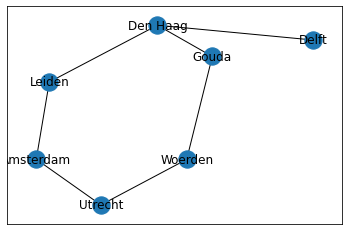

In [7]:
# Plot the graph
nx.draw_networkx(Randstad_Graph)

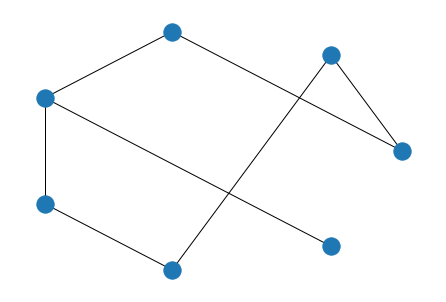

In [8]:
# Plot the graph, using a cicular layout
nx.draw_circular(Randstad_Graph)

In [9]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Amsterdam': 2.5,
 'Utrecht': 2.0,
 'Leiden': 3.5,
 'Den Haag': 7.0,
 'Gouda': 3.5,
 'Woerden': 2.5,
 'Delft': 0.0}

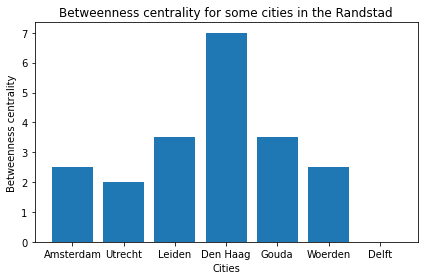

In [10]:
# Plot the values in a bar chart
plt.bar(range(len(betweenness)), betweenness.values(), align='center')
plt.xticks(range(len(betweenness)), list(betweenness.keys()))
plt.title("Betweenness centrality for some cities in the Randstad")
plt.xlabel("Cities")
plt.ylabel("Betweenness centrality")
plt.tight_layout()

In [11]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weigthed = nx.edge_betweenness_centrality(Randstad_Graph, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed

{('Amsterdam', 'Utrecht'): 0.19047619047619047,
 ('Amsterdam', 'Leiden'): 0.19047619047619047,
 ('Utrecht', 'Woerden'): 0.2857142857142857,
 ('Leiden', 'Den Haag'): 0.2857142857142857,
 ('Den Haag', 'Gouda'): 0.38095238095238093,
 ('Den Haag', 'Delft'): 0.2857142857142857,
 ('Gouda', 'Woerden'): 0.38095238095238093}

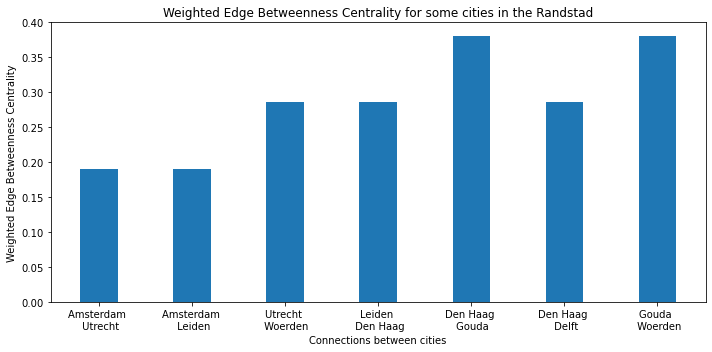

In [12]:
# Helper function for parsing the edge labels
def ppEdges (l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(10, 5))
plt.bar(range(len(edge_betweenness_weigthed)), edge_betweenness_weigthed.values(), width=0.4)
plt.xticks(range(len(edge_betweenness_weigthed)), ppEdges(list(edge_betweenness_weigthed.keys())))
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality